# Title

**Regularization and Decision Boundaries in Logistic Regression**

# Description

The goal of the exercise is to perform classification predictions on a logistic regression model .

# Instructions: 
- We are trying to predict who will have AHD based on Age and MaxHAR. To do so we need to:
- Read the `Heart.csv` as a data frame and split into train and test.
- Assign the predictor and response variables.
- Fit logistic regression models and interpret results
- Compute the accuracy of the model.
- Plot the classification boundaries against the two predictors
- Fit an untuned regularized logistic regression model and compare the classification boundary

# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a> : Accuracy classification score.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.accuracy_score()</a> : Accuracy classification score

<a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.pcolormesh.html" target="_blank">matplotlib.pcolormesh()</a> : Accuracy classification score

**Note: This exercise is auto-graded and you can try multiple attempts.**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)
#heart.head()
heart.describe()

(303, 15)


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [3]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)

**Q1.1** Below we fit an unregularized logistic regression model (`logit1`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates, and interpret general trends.

In [4]:
degree = 1
predictors = ['Age','MaxHR']

X_train1 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])
y_train = heart_train['AHD']


logit1 = LogisticRegression( max_iter = 5000).fit(X_train1, y_train)

print("Logistic Regression Estimated Betas:",
      logit1.coef_,logit1.intercept_)


Logistic Regression Estimated Betas: [[ 0.02584719 -0.03884729]] [4.32595765]


*your interpretation here*

**Q1.1** Fit an unregularized 4th order polynomial (with interactions) logistic regression model (`logit4`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates.

In [5]:
### edTest(test_logit4) ###

degree = 4
predictors = ['Age','MaxHR']

X_train4 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])

logit4 = LogisticRegression(max_iter = 5000).fit(X_train4,heart_train['AHD'])

print("Logistic Regression Estimated Betas:",
      logit4.coef_,logit4.intercept_)


Logistic Regression Estimated Betas: [[ 1.80277628e-09  2.51513524e-09  7.92109641e-08  1.11449327e-07
   1.12697368e-07  2.66467872e-06  3.79398695e-06  4.26956506e-06
  -5.78577522e-07  2.40643877e-06 -3.98076224e-06  2.18631121e-06
  -5.15365861e-07  3.79265847e-08]] [3.75258794e-11]


**Q1.2** Evaluate the models based on misclassification rate in both the test set. 

In [6]:
### edTest(test_misclass) ###

######
# your code here
######

predictors = ['Age','MaxHR']
X_test1 = PolynomialFeatures(degree=1,include_bias=False).fit_transform(heart_test[predictors])
X_test4 = PolynomialFeatures(degree=4,include_bias=False).fit_transform(heart_test[predictors])
y_test = heart_test['AHD']

# use logit.score()
misclass_logit1 = 1-logit1.score(X_test1,y_test)
misclass_logit4 = 1-logit4.score(X_test4,y_test)

print("Overall misclassification rate in test for logit1:",misclass_logit1)
print("Overall misclassification rate in test for logit4:",misclass_logit4)


Overall misclassification rate in test for logit1: 0.27472527472527475
Overall misclassification rate in test for logit4: 0.3296703296703297


The code below performs the classification predictions for the model at all values in the range of the two predictors for `logit1`.  Then the predictions and the train dataset are added to a scatterplot in the second code chunk:

In [7]:
n = 100

x1=np.linspace(np.min(heart[['Age']]),np.max(heart[['Age']]),n)
x2=np.linspace(np.min(heart[['MaxHR']]),np.max(heart[['MaxHR']]),n)
x1v, x2v = np.meshgrid(x1, x2)

# This is how we would typically do the prediction (have a vector of yhats)
#yhat10 = knn10.predict(np.array([x1v.flatten(),x2v.flatten()]).reshape(-1,2))

# To do the predictions and keep the yhats on 2-D (to match the dummy predictor shapes), use this
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = PolynomialFeatures(degree=1,include_bias=False).fit_transform(X)


yhat1 = logit1.predict(X_dummy)


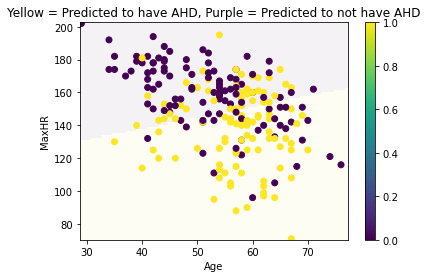

In [8]:

plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

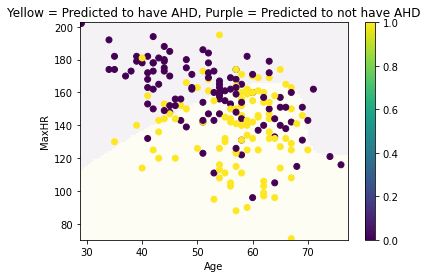

In [9]:
#Perform the same calculation above, but for the 4th order polynomial

X_dummy = PolynomialFeatures(degree=4,include_bias=False).fit_transform(X)
yhat4 = logit4.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat4.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()


**Q1.3** Compare the two models above on how they create the classification boundary.  Which is more likely to be overfit?  How would regularization affect these boundaries?

In the polynomial degree 1 model, it is linear because we are using only the original features (Age and MaxHR) while the model with the polynomial degree 4 is non linear so that the decision boundary becomes more flexible and can fit the data more precisely, however; it is more likely to be overfit.

In the case of logit1, regularization might improve the model's ability to generalize without significantly altering the decision boundary since the model is already fairly simple. For logit4, I suppose regularization is critical because it will help prevent the model from fitting the noise in the training set. Without regularization, non linear or high degree polynomial models can create a very complex decision boundary which is highly sensitive to the training data and likely overfit.

**Q1.4** Fit a ridge-like Logistic Regression model with `C=0.0001` on the 4th order polynomial as before.  Compare this regularized model with the unregularized one by using the classification boundary.

In [12]:
### edTest(test_ridge) ###
# insert penalty='l2' into your LogisticRegression() 

logit_ridge = LogisticRegression(penalty='l2', C=0.0001, max_iter = 5000).fit(X_train4, heart_train['AHD'])


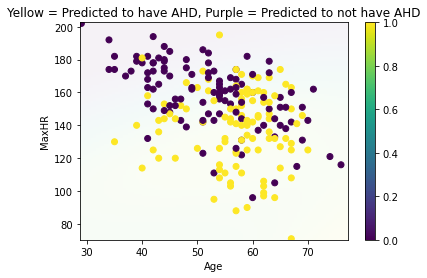

In [13]:

#yhat_ridge = logit_ridge.predict_proba(X_dummy)[:,1]
yhat_ridge = logit_ridge.predict_proba(X_dummy)[:, 1]

plt.pcolormesh(x1v, x2v, yhat_ridge.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

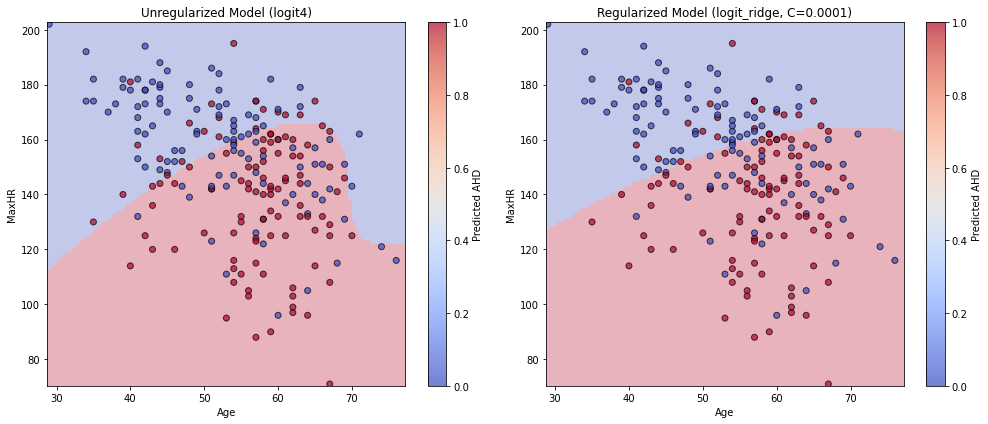

In [18]:
# Generate mesh grid for plotting decision boundaries
n = 100  # number of grid points
x1 = np.linspace(np.min(heart[['Age']]), np.max(heart[['Age']]), n)
x2 = np.linspace(np.min(heart[['MaxHR']]), np.max(heart[['MaxHR']]), n)
x1v, x2v = np.meshgrid(x1, x2)
degree = 4
# Flatten the meshgrid and combine into a single array for prediction
X = np.c_[x1v.ravel(), x2v.ravel()]

# Transform the grid into 4th-degree polynomial features
X_dummy = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X)

# Predict using the unregularized model (logit4)
yhat4 = logit4.predict(X_dummy)

# Predict using the regularized model (logit_ridge)
yhat_ridge = logit_ridge.predict(X_dummy)

# Plot the decision boundary for the unregularized model (logit4)
plt.figure(figsize=(14, 6))

# Plot the decision boundary for unregularized model (logit4)
plt.subplot(1, 2, 1)
plt.pcolormesh(x1v, x2v, yhat4.reshape(x1v.shape), alpha=0.3, cmap="coolwarm")
plt.scatter(heart_train['Age'], heart_train['MaxHR'], c=heart_train['AHD'], cmap="coolwarm", edgecolors='k', alpha=0.7)
plt.title('Unregularized Model (logit4)')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.colorbar(label="Predicted AHD")

# Plot the decision boundary for the regularized model (logit_ridge)
plt.subplot(1, 2, 2)
plt.pcolormesh(x1v, x2v, yhat_ridge.reshape(x1v.shape), alpha=0.3, cmap="coolwarm")
plt.scatter(heart_train['Age'], heart_train['MaxHR'], c=heart_train['AHD'], cmap="coolwarm", edgecolors='k', alpha=0.7)
plt.title('Regularized Model (logit_ridge, C=0.0001)')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.colorbar(label="Predicted AHD")

# Show the plots
plt.tight_layout()
plt.show()


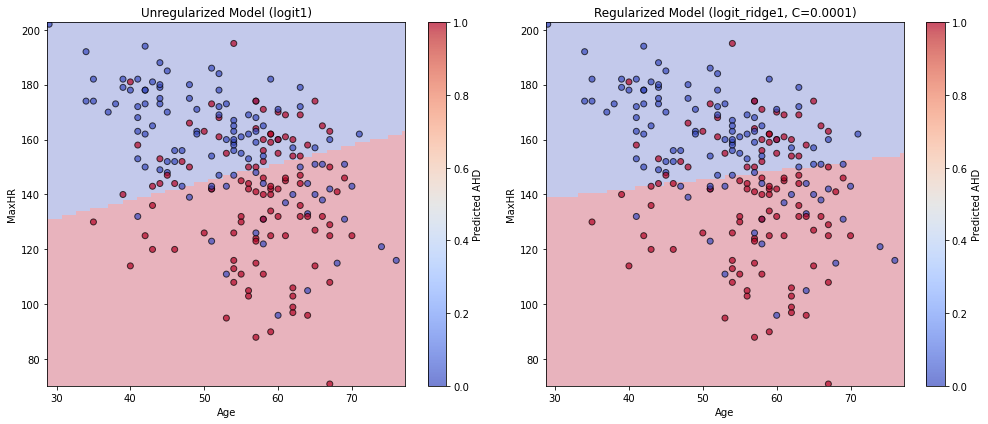

In [19]:
logit_ridge1 = LogisticRegression(penalty='l2', C=0.0001, max_iter = 5000).fit(X_train1, heart_train['AHD'])

# Generate mesh grid for plotting decision boundaries
n = 100  # number of grid points
x1 = np.linspace(np.min(heart[['Age']]), np.max(heart[['Age']]), n)
x2 = np.linspace(np.min(heart[['MaxHR']]), np.max(heart[['MaxHR']]), n)
x1v, x2v = np.meshgrid(x1, x2)
degree = 1
# Flatten the meshgrid and combine into a single array for prediction
X = np.c_[x1v.ravel(), x2v.ravel()]

# Transform the grid into 4th-degree polynomial features
X_dummy1 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X)

# Predict using the unregularized model (logit4)
yhat1 = logit1.predict(X_dummy1)

# Predict using the regularized model (logit_ridge)
yhat_ridge1 = logit_ridge1.predict(X_dummy1)

# Plot the decision boundary for the unregularized model (logit1)
plt.figure(figsize=(14, 6))

# Plot the decision boundary for unregularized model (logit1)
plt.subplot(1, 2, 1)
plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape), alpha=0.3, cmap="coolwarm")
plt.scatter(heart_train['Age'], heart_train['MaxHR'], c=heart_train['AHD'], cmap="coolwarm", edgecolors='k', alpha=0.7)
plt.title('Unregularized Model (logit1)')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.colorbar(label="Predicted AHD")

# Plot the decision boundary for the regularized model (logit_ridge)
plt.subplot(1, 2, 2)
plt.pcolormesh(x1v, x2v, yhat_ridge1.reshape(x1v.shape), alpha=0.3, cmap="coolwarm")
plt.scatter(heart_train['Age'], heart_train['MaxHR'], c=heart_train['AHD'], cmap="coolwarm", edgecolors='k', alpha=0.7)
plt.title('Regularized Model (logit_ridge1, C=0.0001)')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.colorbar(label="Predicted AHD")

# Show the plots
plt.tight_layout()
plt.show()


By comparing the two decision boundaries:

The unregularized model (logit4) will likely produce a very complex and overfit boundary.
The regularized model (logit_ridge) will have a simpler, smoother decision boundary due to the L2 regularization, which controls the complexity of the model and improves generalization.
In general, regularization helps reduce overfitting, especially for complex models like those with high-degree polynomial features. It prevents the model from "memorizing" the training data and instead encourages it to focus on more significant patterns, leading to better performance on unseen data.